# Notebook 4: K-nearest neighbors

This notebook will train the user data on spotify using the KNN model. To get a better understanding of what the data looks like, refer to *Notebook 1*.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Choosing the number of neighbors

The number of neighbors K in KNN is a hyperparameter that needs to be chosen at the time of model building. You can think of K as a controlling variable for the prediction model. There is no optimal number of neighbors that suits all kind of data sets. Each dataset has it's own requirements. 

Research has shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

Generally, Data scientists choose as an odd number if the number of classes is even. There is also the possibility of generating the model on different values of k and checking their performance and to use the Elbow method.

![](docs/KNN.jpg)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier # KNN model

In [3]:
data = pd.read_csv('processed_data.csv')

In [4]:
cols = list(data.columns)

In [5]:
cols.pop(0)
cols.remove('target')

In [6]:
X = data[cols]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

Training the model with an arbitrary number of neighbors

In [7]:
k = 5
model = KNeighborsClassifier(k)

In [8]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
precision = model.score(X_test, y_test)

In [11]:
precision*100

65.84158415841584

In [12]:
# draw the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual User preference'], colnames=['Model prediction'])

<AxesSubplot:xlabel='Model prediction', ylabel='Actual User preference'>

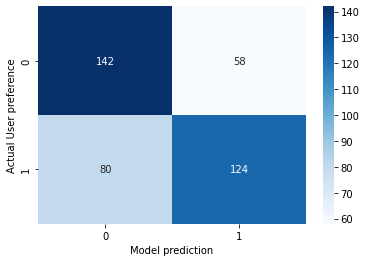

In [13]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')

In [14]:
TP, FP = confusion_matrix[0]
FN, TN = confusion_matrix[1]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2*TP / (2*TP + FP + FN)

In [15]:
print("Precision = {:.2f}\nRecall = {:.2f}\nF1 = {:.2f}".format(precision, recall, F1))

Precision = 0.64
Recall = 0.71
F1 = 0.67


In this part, we will train the model with different values of `k` and compare the F1 scores for each value.

In [16]:
x_plot = range(1, 15)
y_plot = []
for k in x_plot:
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrix = pd.crosstab(y_test, y_pred)
    TP, FP = confusion_matrix[0]
    FN, TN = confusion_matrix[1]

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 2*TP / (2*TP + FP + FN)
    y_plot.append(F1)

In [17]:
import matplotlib.pyplot as plt

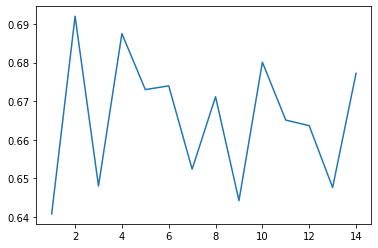

In [18]:
plt.plot(x_plot, y_plot)
plt.show()

The plot shows that the best F1 score corresponds to `k = 2`. Note that these F1-score values only take into consideration the accuracy and recall values of the class `0`. For a more standardized result, we will use **the average F1 score** of all classes as returned by the `classification_report` function below.

The next part also aims to find the best `k` value but uses the `GridSearchCV` function

In [19]:
from sklearn.model_selection import GridSearchCV   #create new a knn model

knn2 = KNeighborsClassifier()   #create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}   #use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10, scoring='f1', verbose=1)  #fit model to data
knn_gscv.fit(X_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='f1', verbose=1)

In [20]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 13}

Notice that `GridSearchCV` does NOT return the same optimal number of neighbors. This is because the F1-score used earlier was relative to the first class only.

In [21]:
grid_predictions = knn_gscv.predict(X_test) # k = 13
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       200
           1       0.65      0.59      0.62       204

    accuracy                           0.63       404
   macro avg       0.64      0.63      0.63       404
weighted avg       0.64      0.63      0.63       404



Training the model with `k = 2`

In [22]:
model = KNeighborsClassifier(2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.86      0.69       200
           1       0.74      0.38      0.50       204

    accuracy                           0.62       404
   macro avg       0.66      0.62      0.60       404
weighted avg       0.66      0.62      0.60       404

